# 20164567곽태인 금융인공지능 기말고사 

In [322]:
from datetime import datetime 
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
plt.rcParams["figure.figsize"] = (10, 6) # (w, h)

In [323]:
!pip install -U finance-datareader
import FinanceDataReader as fdr

krx = fdr.StockListing('KOSPI')
print(len(krx))

Requirement already up-to-date: finance-datareader in c:\users\82104\anaconda3\lib\site-packages (0.9.10)
997


In [324]:
!mkdir krx

하위 디렉터리 또는 파일 krx이(가) 이미 있습니다.


In [325]:
from concurrent import futures
import csv 

end = datetime(2020,11,30)
start = datetime(2010,1,1)
bad = []
krx_list=krx['Symbol'].tolist()
print(len(krx_list))

997


In [326]:
def download(krx_item):


    sym=krx_item
    df=fdr.DataReader(sym, start, end)
    dfnew=df.copy()
    dfnew['Symbol']  =sym
    dfnew.to_csv(f"krx/{sym}.csv", quoting=csv.QUOTE_MINIMAL)    

workers=min(50,len(krx))
with futures.ThreadPoolExecutor(workers) as executor: 
    res = executor.map(download, krx_list) 

In [327]:
print(len(krx_list))
! find krx -type f | wc -l

997


'wc'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.


In [328]:
remove_list=[]

stocks=pd.DataFrame() 
for krx_item in krx_list:
  tmp=pd.read_csv(f"krx/{krx_item}.csv",parse_dates=True)
  if ('Close' in tmp.columns) and ('Date' in tmp.columns):
    tmp.set_index(tmp['Date'],inplace=True,drop=False) 
    tmp_close=tmp['Close'].rename(krx_item) 
    stocks=pd.concat([stocks,tmp_close],axis=1,sort=True) 
  else:
    print("delete : ",{krx_item})
    remove_list.append(krx_item)

for remove_item in remove_list: 
  krx_list.remove(remove_item)

stocks = stocks.loc[:,~stocks.columns.duplicated()]

delete :  {'73501BA2'}
delete :  {'73502BA2'}
delete :  {'73503BA2'}
delete :  {'71901B96'}
delete :  {'71902B96'}
delete :  {'71903B96'}
delete :  {'71901B92'}
delete :  {'71903B92'}
delete :  {'71902B92'}
delete :  {'71901B9B'}
delete :  {'71902B9B'}
delete :  {'72501773'}
delete :  {'72502773'}
delete :  {'70901B95'}
delete :  {'70902B95'}
delete :  {'70903B95'}
delete :  {'70101781'}
delete :  {'70102B96'}
delete :  {'70103B96'}
delete :  {'74401777'}
delete :  {'74401769'}
delete :  {'74401722'}
delete :  {'74401773'}
delete :  {'71301A1B'}
delete :  {'74601669'}
delete :  {'70101B95'}
delete :  {'70101B96'}
delete :  {'70101786'}
delete :  {'70102786'}
delete :  {'72504A3B'}
delete :  {'72501BA2'}
delete :  {'72502BA2'}
delete :  {'75602782'}
delete :  {'75601782'}
delete :  {'75601BA2'}
delete :  {'75602BA2'}
delete :  {'74701789'}
delete :  {'74701B8A'}
delete :  {'74702B8A'}
delete :  {'74701B8B'}
delete :  {'74701B96'}
delete :  {'74701B9A'}
delete :  {'74701B97'}
delete :  {

## 1번

In [341]:
stk = stocks.dropna(axis=1)
stk

,006840,001460,001465,001040,079160,000120,011150,011155,001045,097950,...,004800,094280,093370,005870,005010,069260,000540,000547,000545,003280
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,10331,125000,55400,58652,19139,54500,1065,2990,19867,207000,...,50480,4830,3726,7170,15900,17885,6850,5090,2200,1142
2010-01-05,10206,126000,55500,59595,19230,54400,1045,2900,20088,220000,...,52255,5550,3702,7430,16100,17312,6630,5000,2175,1135
2010-01-06,10206,124500,55300,59595,19593,56400,1025,2850,20176,220500,...,54859,5900,3755,7700,16600,17613,6690,5110,2185,1127
2010-01-07,10300,127000,55700,60444,19729,56600,1055,2865,20309,218000,...,53143,5600,3785,7610,16650,17312,6500,5000,2130,1219
2010-01-08,10362,127500,60000,63556,20681,57600,1040,2825,20662,218000,...,55037,5800,3804,7560,16600,17432,6440,5000,2130,1209
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-24,22300,277500,136500,81300,22950,165500,5180,45500,50000,367000,...,81300,22200,9670,6040,7290,24800,2800,23200,14850,258
2020-11-25,21850,278500,136500,81300,23150,163500,5050,45000,50000,366500,...,79600,21800,9390,6020,7440,24450,2875,23550,14050,258
2020-11-26,21650,276500,136500,80400,22650,166000,5300,45950,50100,366500,...,79800,21700,9400,6010,7460,24200,2865,23400,13500,258


In [342]:
lag_stk=stk.shift(1)
lag_stk

,006840,001460,001465,001040,079160,000120,011150,011155,001045,097950,...,004800,094280,093370,005870,005010,069260,000540,000547,000545,003280
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,10331.0,125000.0,55400.0,58652.0,19139.0,54500.0,1065.0,2990.0,19867.0,207000.0,...,50480.0,4830.0,3726.0,7170.0,15900.0,17885.0,6850.0,5090.0,2200.0,1142.0
2010-01-06,10206.0,126000.0,55500.0,59595.0,19230.0,54400.0,1045.0,2900.0,20088.0,220000.0,...,52255.0,5550.0,3702.0,7430.0,16100.0,17312.0,6630.0,5000.0,2175.0,1135.0
2010-01-07,10206.0,124500.0,55300.0,59595.0,19593.0,56400.0,1025.0,2850.0,20176.0,220500.0,...,54859.0,5900.0,3755.0,7700.0,16600.0,17613.0,6690.0,5110.0,2185.0,1127.0
2010-01-08,10300.0,127000.0,55700.0,60444.0,19729.0,56600.0,1055.0,2865.0,20309.0,218000.0,...,53143.0,5600.0,3785.0,7610.0,16650.0,17312.0,6500.0,5000.0,2130.0,1219.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-24,21100.0,276000.0,137000.0,80400.0,21700.0,169000.0,5320.0,45300.0,49650.0,370500.0,...,78000.0,22250.0,9650.0,5940.0,7310.0,24550.0,2765.0,23000.0,14650.0,258.0
2020-11-25,22300.0,277500.0,136500.0,81300.0,22950.0,165500.0,5180.0,45500.0,50000.0,367000.0,...,81300.0,22200.0,9670.0,6040.0,7290.0,24800.0,2800.0,23200.0,14850.0,258.0
2020-11-26,21850.0,278500.0,136500.0,81300.0,23150.0,163500.0,5050.0,45000.0,50000.0,366500.0,...,79600.0,21800.0,9390.0,6020.0,7440.0,24450.0,2875.0,23550.0,14050.0,258.0


In [343]:
rtn=(np.log(stk) - np.log(lag_stk))*100
rtn

,006840,001460,001465,001040,079160,000120,011150,011155,001045,097950,...,004800,094280,093370,005870,005010,069260,000540,000547,000545,003280
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,-1.217330,0.796817,0.180343,1.595000,0.474342,-0.183655,-1.895791,-3.056265,1.106256,6.090875,...,3.455836,13.895146,-0.646206,3.562020,1.250016,-3.256247,-3.264385,-1.783992,-1.142870,-0.614846
2010-01-06,0.000000,-1.197619,-0.361011,0.000000,1.870080,3.610500,-1.932427,-1.739174,0.437116,0.227015,...,4.863068,6.115442,1.421507,3.569447,3.058342,1.723736,0.900907,2.176149,0.458716,-0.707342
2010-01-07,0.916811,1.988137,0.720724,1.414564,0.691727,0.353983,2.884815,0.524936,0.657036,-1.140263,...,-3.177986,-5.218575,0.795760,-1.175716,0.300752,-1.723736,-2.881170,-2.176149,-2.549385,7.847162
2010-01-08,0.600137,0.392928,7.436442,5.020409,4.712577,1.751358,-1.432005,-1.405999,1.723213,0.000000,...,3.501929,3.509132,0.500726,-0.659198,-0.300752,0.690769,-0.927364,0.000000,0.000000,-0.823728
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-24,5.531364,0.542007,-0.365631,1.113184,5.600568,-2.092752,-2.666825,0.440529,0.702461,-0.949160,...,4.143719,-0.224972,0.207039,1.669488,-0.273973,1.013180,1.257878,0.865806,1.355953,0.000000
2020-11-25,-2.038576,0.359713,0.000000,0.000000,0.867684,-1.215820,-2.541681,-1.104984,0.000000,-0.136333,...,-2.113192,-1.818232,-2.938302,-0.331675,2.036730,-1.421344,2.643326,1.497354,-5.537747,0.000000
2020-11-26,-0.919547,-0.720724,0.000000,-1.113184,-2.183493,1.517480,4.831858,2.089136,0.199800,0.000000,...,0.250941,-0.459771,0.106440,-0.166251,0.268457,-1.027758,-0.348432,-0.638980,-3.993271,0.000000


In [344]:
ksp=fdr.DataReader("KS11",'2010-01-01','2020-11-30')
print(ksp['Close'],stk['005930']) #삼성전자(임의의 한 주식)와 코스피의 close

Date
2010-01-04    1696.14
2010-01-05    1690.62
2010-01-06    1705.32
2010-01-07    1683.45
2010-01-08    1695.26
               ...   
2020-11-24    2617.76
2020-11-25    2601.54
2020-11-26    2625.91
2020-11-27    2633.45
2020-11-30    2591.34
Name: Close, Length: 2694, dtype: float64 Date
2010-01-04    16180
2010-01-05    16440
2010-01-06    16820
2010-01-07    16260
2010-01-08    16420
              ...  
2020-11-24    67700
2020-11-25    66600
2020-11-26    68000
2020-11-27    68200
2020-11-30    66700
Name: 005930, Length: 2693, dtype: int64


In [345]:
lag_ksp=ksp['Close'].shift(1)
print(lag_ksp,lag_stk['005930']) #삼성전자(임의의 한 주식)와 코스피의 lagged close

Date
2010-01-04        NaN
2010-01-05    1696.14
2010-01-06    1690.62
2010-01-07    1705.32
2010-01-08    1683.45
               ...   
2020-11-24    2602.59
2020-11-25    2617.76
2020-11-26    2601.54
2020-11-27    2625.91
2020-11-30    2633.45
Name: Close, Length: 2694, dtype: float64 Date
2010-01-04        NaN
2010-01-05    16180.0
2010-01-06    16440.0
2010-01-07    16820.0
2010-01-08    16260.0
               ...   
2020-11-24    67500.0
2020-11-25    67700.0
2020-11-26    66600.0
2020-11-27    68000.0
2020-11-30    68200.0
Name: 005930, Length: 2693, dtype: float64


In [346]:
rtn_ksp=(np.log(ksp['Close']) - np.log(lag_ksp))*100
print(rtn_ksp, rtn['005930']) #삼성전자(임의의 한 주식)와 코스피의 Return)

Date
2010-01-04         NaN
2010-01-05   -0.325976
2010-01-06    0.865745
2010-01-07   -1.290752
2010-01-08    0.699086
                ...   
2020-11-24    0.581189
2020-11-25   -0.621541
2020-11-26    0.932393
2020-11-27    0.286727
2020-11-30   -1.611966
Name: Close, Length: 2694, dtype: float64 Date
2010-01-04         NaN
2010-01-05    1.594148
2010-01-06    2.285126
2010-01-07   -3.386055
2010-01-08    0.979200
                ...   
2020-11-24    0.295858
2020-11-25   -1.638160
2020-11-26    2.080313
2020-11-27    0.293686
2020-11-30   -2.223961
Name: 005930, Length: 2693, dtype: float64


## 2번

In [257]:
momentum_20=lag_stk.pct_change(periods=20)*100 
momentum_60=lag_stk.pct_change(periods=60)*100
momentum_120=lag_stk.pct_change(periods=120)*100 
momentum_180=lag_stk.pct_change(periods=180)*100 
momentum_240=lag_stk.pct_change(periods=240)*100

In [258]:
kospi_20=lag_ksp.pct_change(periods=20)*100 
kospi_60=lag_ksp.pct_change(periods=60)*100
kospi_120=lag_ksp.pct_change(periods=120)*100 
kospi_180=lag_ksp.pct_change(periods=180)*100 
kospi_240=lag_ksp.pct_change(periods=240)*100

In [259]:
eqt1 = pd.concat([momentum_20['005930'], momentum_60['005930'], momentum_120['005930'],momentum_180['005930'],momentum_240['005930']],axis=1)
eqt1.columns=['ss20', 'ss60', 'ss120', 'ss180', 'ss240']
print(eqt1)
#삼성전자(임의의 한 주식)의 모멘텀

                 ss20       ss60      ss120      ss180      ss240
Date                                                             
2010-01-04        NaN        NaN        NaN        NaN        NaN
2010-01-05        NaN        NaN        NaN        NaN        NaN
2010-01-06        NaN        NaN        NaN        NaN        NaN
2010-01-07        NaN        NaN        NaN        NaN        NaN
2010-01-08        NaN        NaN        NaN        NaN        NaN
...               ...        ...        ...        ...        ...
2020-11-24  11.754967  19.680851  31.835938  21.841155  35.270541
2020-11-25  13.210702  20.035461  31.712062  17.944251  36.905966
2020-11-26  12.881356  19.784173  22.201835  15.224913  34.545455
2020-11-27  17.039587  22.743682  24.542125  20.353982  34.920635
2020-11-30  20.494700  26.296296  22.882883  25.830258  33.203125

[2693 rows x 5 columns]


In [260]:
eqt2 = pd.concat([kospi_20, kospi_60, kospi_120,kospi_180, kospi_240] , axis=1)
eqt2.columns=['kp20','kp60','kp120','kp180','kp240']
print(eqt2)
#코스피의 모멘텀

                 kp20       kp60      kp120      kp180      kp240
Date                                                             
2010-01-04        NaN        NaN        NaN        NaN        NaN
2010-01-05        NaN        NaN        NaN        NaN        NaN
2010-01-06        NaN        NaN        NaN        NaN        NaN
2010-01-07        NaN        NaN        NaN        NaN        NaN
2010-01-08        NaN        NaN        NaN        NaN        NaN
...               ...        ...        ...        ...        ...
2020-11-24  11.036260   9.965649  26.028532  29.215302  24.880162
2020-11-25  12.309725  10.485709  25.420302  27.117072  26.529685
2020-11-26  10.927573  10.965898  21.170936  24.758543  26.243000
2020-11-27  12.861300  11.560455  22.068353  28.707198  26.133487
2020-11-30  16.156849  13.209697  20.696925  34.719174  26.083834

[2694 rows x 5 columns]


## 3번

In [261]:
tStartDay=datetime(2010,1,1).strftime("%Y-%m-%d")
tEndDay=tStartDay
momentum_1d=lag_stk.pct_change(periods=1)*100

In [262]:
momentumList=['momentum_20','momentum_60','momentum_120','momentum_180','momentum_240']

Df_best=pd.DataFrame(0,columns=momentumList,index=lag_stk.index)
Df_median=pd.DataFrame(0,columns=momentumList,index=lag_stk.index)
Df_worst=pd.DataFrame(0,columns=momentumList,index=lag_stk.index)

In [263]:
def bestrtn(momentumDF,columname,idx):
    
    top10=momentumDF.loc[idx].sort_values(ascending=False).index[0:10]
    
    mean=0
    for tStock in top10:
        mean=mean+momentum_1d.loc[idx:].iloc[1].loc[tStock]
    mean=mean/10
        
    Df_best.loc[idx,columname]=mean

In [264]:
i=0
calculationPeriod=2692
for idx, row in stocks.iterrows():
    if idx>=tStartDay and i<calculationPeriod:

      bestrtn(momentum_20,momentumList[0],idx)
      bestrtn(momentum_60,momentumList[1],idx)
      bestrtn(momentum_120,momentumList[2],idx)
      bestrtn(momentum_180,momentumList[3],idx)
      bestrtn(momentum_240,momentumList[4],idx)

      i=i+1
      tEndDay=idx
      continue

In [265]:
Df_best

,momentum_20,momentum_60,momentum_120,momentum_180,momentum_240
Date,,,,,
2010-01-04,NaN,NaN,NaN,NaN,NaN
2010-01-05,0.417495,0.417495,0.417495,0.417495,0.417495
2010-01-06,0.104064,0.104064,0.104064,0.104064,0.104064
2010-01-07,0.910430,0.910430,0.910430,0.910430,0.910430
2010-01-08,1.937649,1.937649,1.937649,1.937649,1.937649
...,...,...,...,...,...
2020-11-24,0.003958,4.622774,3.210548,3.817754,2.265775
2020-11-25,0.232972,-0.011531,-2.258805,-2.549976,-1.450811
2020-11-26,-0.795103,-1.168233,0.792887,0.498427,0.064596


In [266]:
def medianrtn(momentumDF,columname,idx):
    
    middle10=momentumDF.loc[idx].sort_values(ascending=False).index[354:363]
    
    mean=0
    for tStock in middle10:
        mean=mean+momentum_1d.loc[idx:].iloc[1].loc[tStock]
    mean=mean/10
        
    Df_median.loc[idx,columname]=mean

In [267]:
i=0
calculationPeriod=2692
for idx, row in stocks.iterrows():
    if idx>=tStartDay and i<calculationPeriod:

      medianrtn(momentum_20,momentumList[0],idx)
      medianrtn(momentum_60,momentumList[1],idx)
      medianrtn(momentum_120,momentumList[2],idx)
      medianrtn(momentum_180,momentumList[3],idx)
      medianrtn(momentum_240,momentumList[4],idx)

      i=i+1
      tEndDay=idx
      continue

In [268]:
Df_median

,momentum_20,momentum_60,momentum_120,momentum_180,momentum_240
Date,,,,,
2010-01-04,NaN,NaN,NaN,NaN,NaN
2010-01-05,0.564662,0.564662,0.564662,0.564662,0.564662
2010-01-06,0.719145,0.719145,0.719145,0.719145,0.719145
2010-01-07,-0.430630,-0.430630,-0.430630,-0.430630,-0.430630
2010-01-08,0.401706,0.401706,0.401706,0.401706,0.401706
...,...,...,...,...,...
2020-11-24,0.567279,-0.246993,-0.183307,1.096055,0.915720
2020-11-25,-1.849619,-0.753152,0.787170,-0.597816,-0.164626
2020-11-26,0.030350,0.872862,-0.248280,0.458702,0.319642


In [269]:
def worstrtn(momentumDF,columname,idx):
    
    bottom10=momentumDF.loc[idx].sort_values(ascending=False).index[707:716]
    
    mean=0
    for tStock in bottom10:
        mean=mean+momentum_1d.loc[idx:].iloc[1].loc[tStock]
    mean=mean/10
        
    Df_worst.loc[idx,columname]=mean

In [270]:
i=0
calculationPeriod=2692
for idx, row in stocks.iterrows():
    if idx>=tStartDay and i<calculationPeriod:

      worstrtn(momentum_20,momentumList[0],idx)
      worstrtn(momentum_60,momentumList[1],idx)
      worstrtn(momentum_120,momentumList[2],idx)
      worstrtn(momentum_180,momentumList[3],idx)
      worstrtn(momentum_240,momentumList[4],idx)

      i=i+1
      tEndDay=idx
      continue

In [271]:
Df_worst

,momentum_20,momentum_60,momentum_120,momentum_180,momentum_240
Date,,,,,
2010-01-04,NaN,NaN,NaN,NaN,NaN
2010-01-05,0.921381,0.921381,0.921381,0.921381,0.921381
2010-01-06,1.907605,1.907605,1.907605,1.907605,1.907605
2010-01-07,-0.620900,-0.620900,-0.620900,-0.620900,-0.620900
2010-01-08,0.206582,0.206582,0.206582,0.206582,0.206582
...,...,...,...,...,...
2020-11-24,0.065680,-0.504124,1.610984,0.753264,1.045967
2020-11-25,-1.317517,-0.594733,-1.832097,-0.914248,-0.187238
2020-11-26,-0.210324,0.125163,-0.491068,0.007765,-0.242740


In [272]:
Df_best.columns=['best_20','best_60','best_120','best_180','best_240']
Df_median.columns=['median_20','median_60','median_120','median_180','median_240']
Df_worst.columns=['worst_20','worst_60','worst_120','worst_180','worst_240']
eqt3=pd.concat([Df_best,Df_median,Df_worst],axis=1)
print(eqt3)

             best_20   best_60  best_120  best_180  best_240  median_20  \
Date                                                                      
2010-01-04       NaN       NaN       NaN       NaN       NaN        NaN   
2010-01-05  0.417495  0.417495  0.417495  0.417495  0.417495   0.564662   
2010-01-06  0.104064  0.104064  0.104064  0.104064  0.104064   0.719145   
2010-01-07  0.910430  0.910430  0.910430  0.910430  0.910430  -0.430630   
2010-01-08  1.937649  1.937649  1.937649  1.937649  1.937649   0.401706   
...              ...       ...       ...       ...       ...        ...   
2020-11-24  0.003958  4.622774  3.210548  3.817754  2.265775   0.567279   
2020-11-25  0.232972 -0.011531 -2.258805 -2.549976 -1.450811  -1.849619   
2020-11-26 -0.795103 -1.168233  0.792887  0.498427  0.064596   0.030350   
2020-11-27 -0.287618 -1.477428  0.830320 -0.760903 -1.165467   0.584168   
2020-11-30  0.000000  0.000000  0.000000  0.000000  0.000000   0.000000   

            median_60  m

## 4번

In [366]:
eqt4=pd.merge(eqt3, rtn_ksp, left_index=True, right_index=True, how='inner')
eqt4.rename(columns = {"Close": "ksp"}, inplace = True)

eqt4

,best_20,best_60,best_120,best_180,best_240,median_20,median_60,median_120,median_180,median_240,worst_20,worst_60,worst_120,worst_180,worst_240,ksp
Date,,,,,,,,,,,,,,,,
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,0.417495,0.417495,0.417495,0.417495,0.417495,0.564662,0.564662,0.564662,0.564662,0.564662,0.921381,0.921381,0.921381,0.921381,0.921381,-0.325976
2010-01-06,0.104064,0.104064,0.104064,0.104064,0.104064,0.719145,0.719145,0.719145,0.719145,0.719145,1.907605,1.907605,1.907605,1.907605,1.907605,0.865745
2010-01-07,0.910430,0.910430,0.910430,0.910430,0.910430,-0.430630,-0.430630,-0.430630,-0.430630,-0.430630,-0.620900,-0.620900,-0.620900,-0.620900,-0.620900,-1.290752
2010-01-08,1.937649,1.937649,1.937649,1.937649,1.937649,0.401706,0.401706,0.401706,0.401706,0.401706,0.206582,0.206582,0.206582,0.206582,0.206582,0.699086
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-24,0.003958,4.622774,3.210548,3.817754,2.265775,0.567279,-0.246993,-0.183307,1.096055,0.915720,0.065680,-0.504124,1.610984,0.753264,1.045967,0.581189
2020-11-25,0.232972,-0.011531,-2.258805,-2.549976,-1.450811,-1.849619,-0.753152,0.787170,-0.597816,-0.164626,-1.317517,-0.594733,-1.832097,-0.914248,-0.187238,-0.621541
2020-11-26,-0.795103,-1.168233,0.792887,0.498427,0.064596,0.030350,0.872862,-0.248280,0.458702,0.319642,-0.210324,0.125163,-0.491068,0.007765,-0.242740,0.932393


In [367]:
df1=eqt4.mean()
df2=eqt4.std()

In [368]:
df=eqt4
stats = df.describe()
stats.loc['skew'] = df.skew().tolist()
stats.loc['kurt'] = df.kurtosis().tolist()
stats.loc['mean/std'] = df1/df2.tolist()
print(stats)

              best_20      best_60     best_120     best_180     best_240  \
count     2692.000000  2692.000000  2692.000000  2692.000000  2692.000000   
mean         0.036311    -0.031538    -0.004426    -0.011355     0.002485   
std          3.326060     3.047192     2.782679     2.583607     2.511783   
min        -16.551055   -15.159043   -15.959916   -13.556238   -16.077511   
25%         -1.728839    -1.710042    -1.476920    -1.479223    -1.315598   
50%          0.028819    -0.014951     0.049594    -0.002860     0.021114   
75%          1.825519     1.661168     1.533206     1.436894     1.329520   
max         21.114383    17.284959    13.905969    12.610959    11.875827   
skew         0.047036     0.041462    -0.133020     0.009290    -0.126538   
kurt         3.412552     2.478369     2.392982     2.114459     2.884728   
mean/std     0.010917    -0.010350    -0.001591    -0.004395     0.000989   

            median_20    median_60   median_120   median_180   median_240  

## 대부분 std가  높게 나타나고 있다. 전반적으로 skew는 음수를 나타내야 하는데 그렇지 못한 것이 여럿 보인다.  kurt를 살펴보면 3이상일 경우 꼬리가 두껍다고 할 수 있는데 best모멘텀의 몇개를 제외하곤 다  두껍다. 평균/표준편차가 0에 가까울수록 변동성이 작은데 대부분 낮고 best_240이 변동성이 제일 작다할 수 있다.

## 5번

In [369]:
eqt4.corr()

,best_20,best_60,best_120,best_180,best_240,median_20,median_60,median_120,median_180,median_240,worst_20,worst_60,worst_120,worst_180,worst_240,ksp
best_20,1.000000,0.707508,0.587208,0.513243,0.473416,0.218075,0.248114,0.258970,0.211537,0.243663,0.197412,0.170615,0.224202,0.138136,0.222938,0.188057
best_60,0.707508,1.000000,0.784768,0.686861,0.621816,0.278016,0.296846,0.314489,0.275154,0.295643,0.345884,0.242423,0.255086,0.190099,0.265256,0.260360
best_120,0.587208,0.784768,1.000000,0.823030,0.750091,0.315457,0.324842,0.335610,0.309041,0.322248,0.377421,0.293739,0.277429,0.211519,0.279272,0.315403
best_180,0.513243,0.686861,0.823030,1.000000,0.867265,0.337481,0.359762,0.364226,0.337429,0.334182,0.386145,0.316502,0.299614,0.203599,0.267723,0.346709
best_240,0.473416,0.621816,0.750091,0.867265,1.000000,0.342250,0.362857,0.366365,0.338182,0.341598,0.389935,0.334188,0.327852,0.212686,0.283724,0.358059
median_20,0.218075,0.278016,0.315457,0.337481,0.342250,1.000000,0.636461,0.621340,0.602486,0.619007,0.435627,0.472897,0.482678,0.336783,0.450227,0.639028
median_60,0.248114,0.296846,0.324842,0.359762,0.362857,0.636461,1.000000,0.646736,0.626049,0.634671,0.454222,0.473900,0.482240,0.349994,0.469598,0.642357
median_120,0.258970,0.314489,0.335610,0.364226,0.366365,0.621340,0.646736,1.000000,0.641195,0.634699,0.458011,0.492219,0.478284,0.351602,0.467043,0.654532
median_180,0.211537,0.275154,0.309041,0.337429,0.338182,0.602486,0.626049,0.641195,1.000000,0.645732,0.448191,0.475452,0.452736,0.330516,0.441831,0.626526
median_240,0.243663,0.295643,0.322248,0.334182,0.341598,0.619007,0.634671,0.634699,0.645732,1.000000,0.434826,0.469613,0.468956,0.330252,0.440776,0.621977


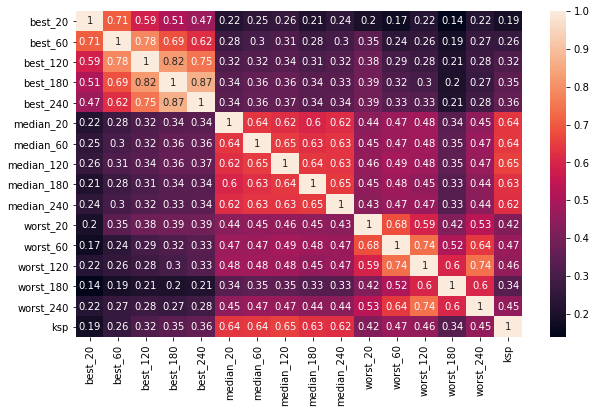

In [370]:
sns.heatmap(eqt4.corr(), annot=True)
plt.show()

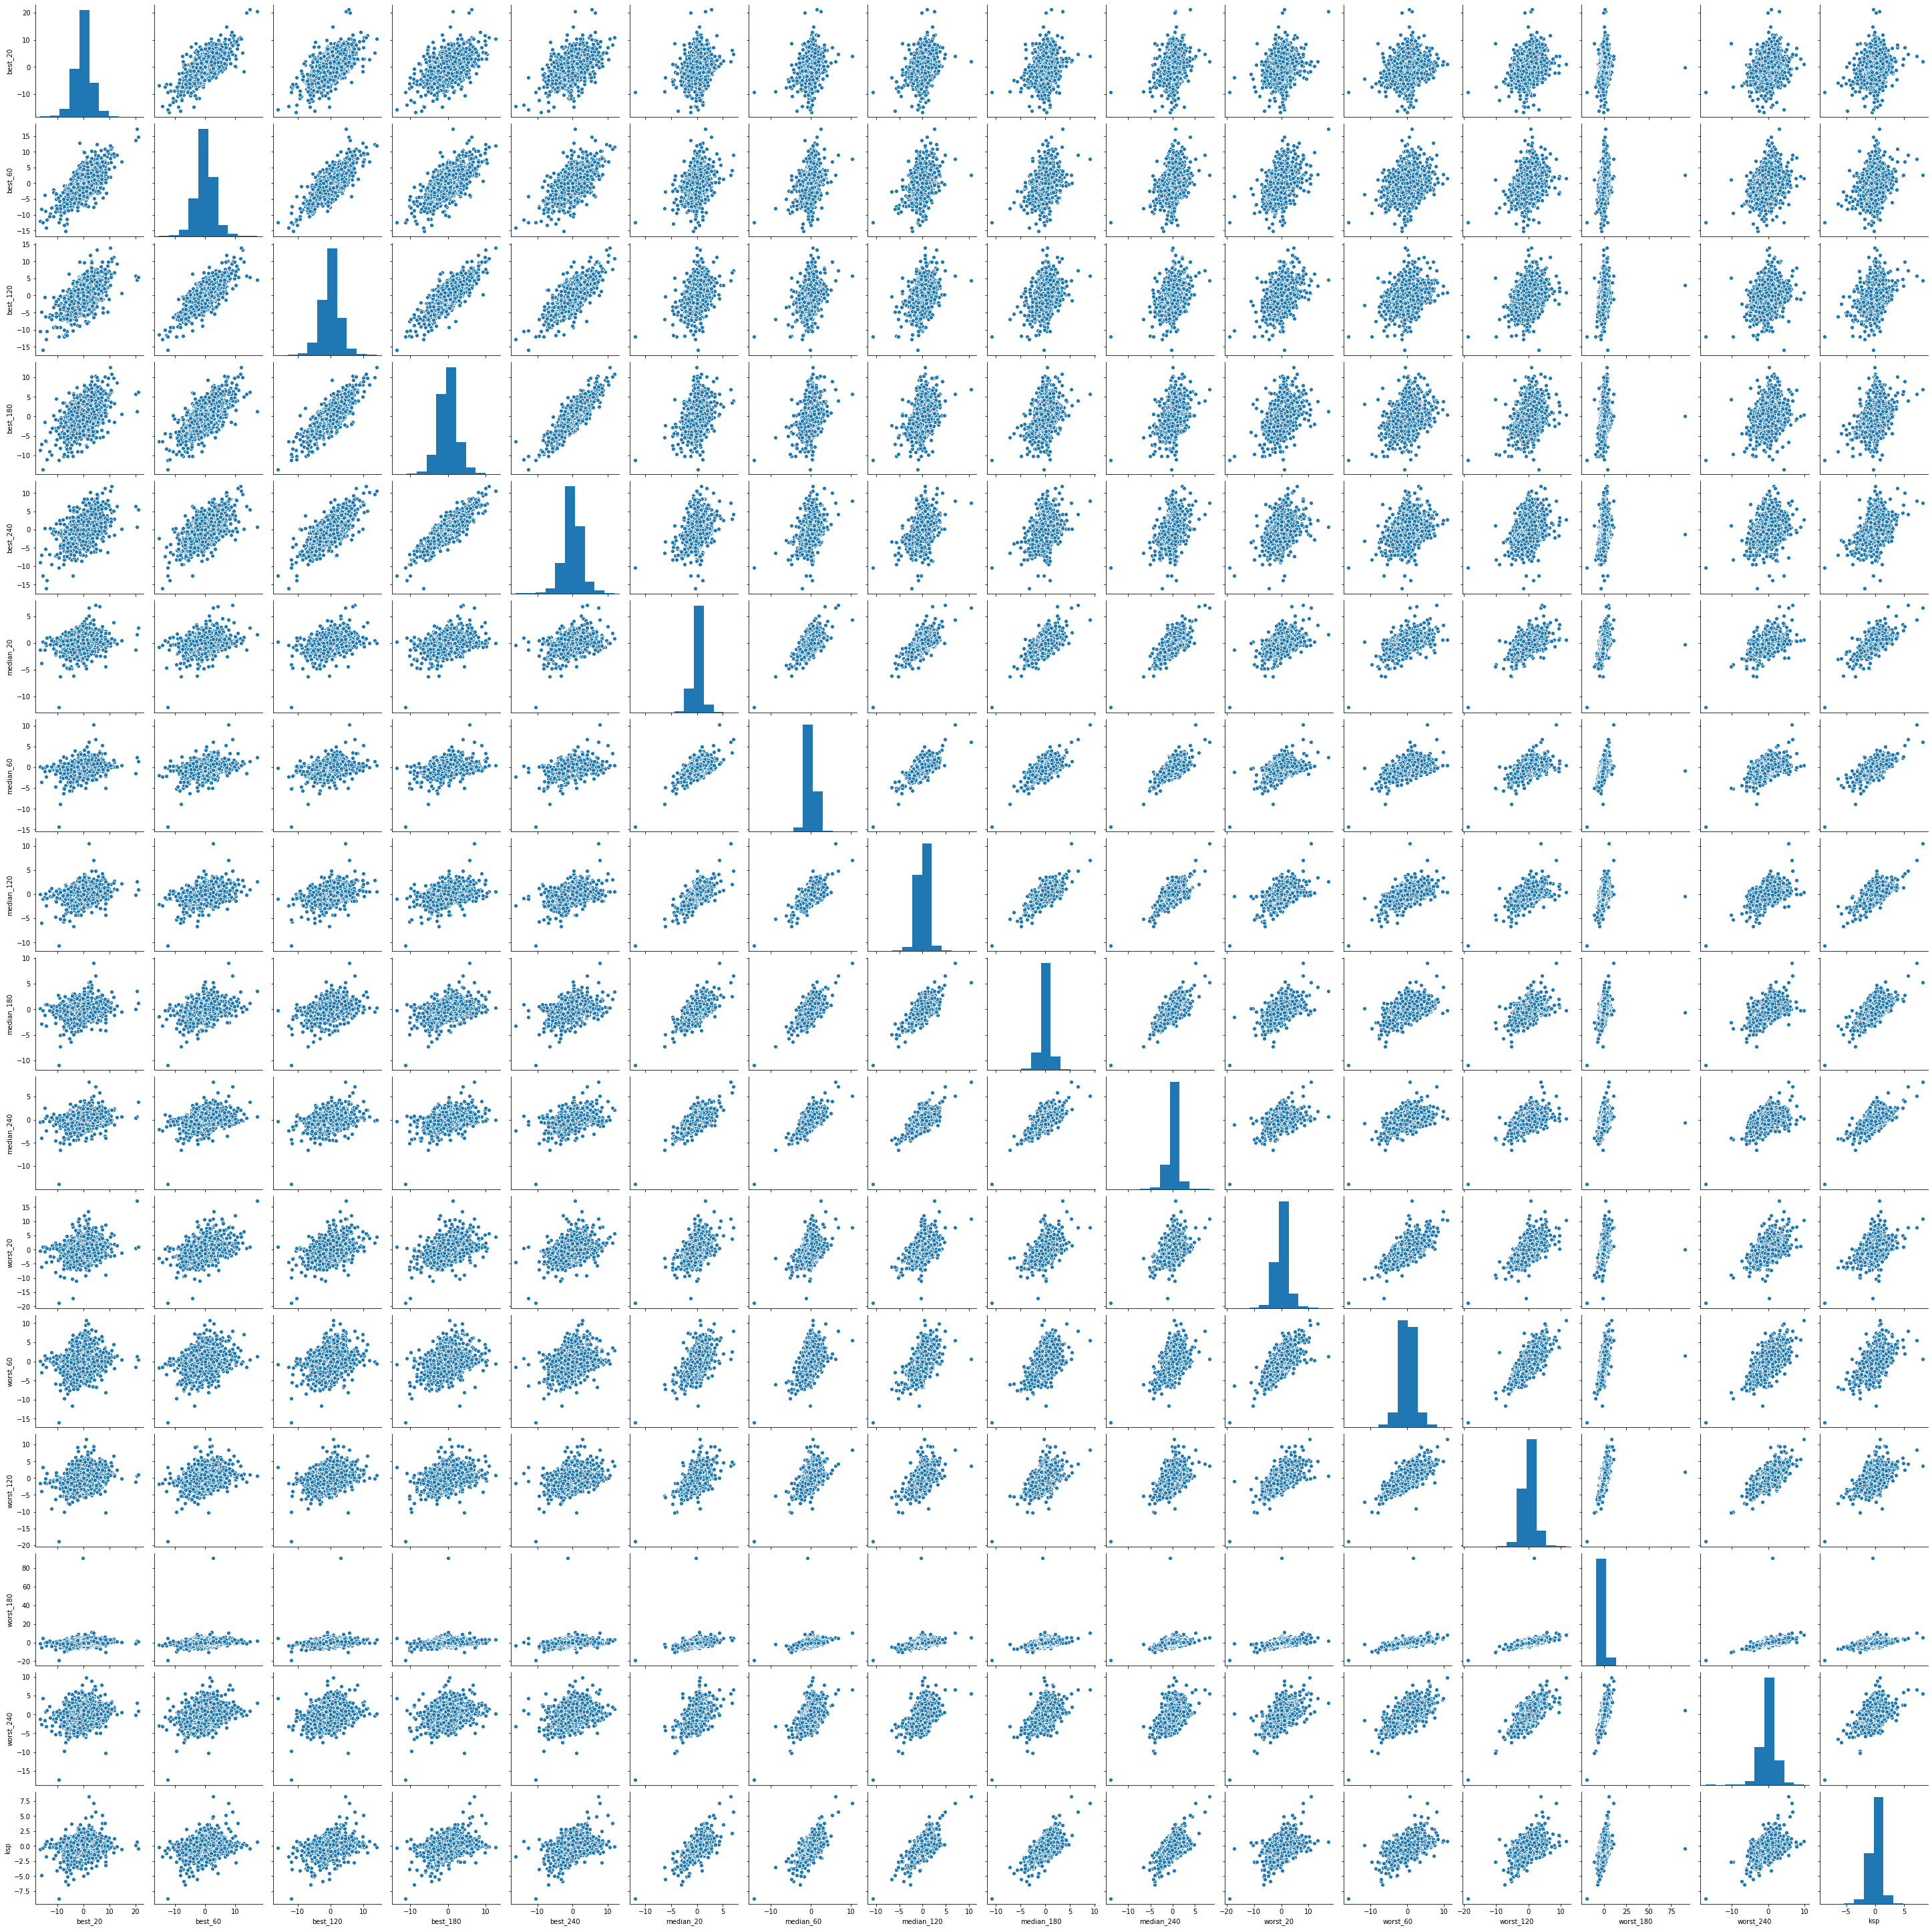

In [371]:
sns.pairplot(eqt4)

## 히트맵의 밝은 부분이 상관계수가 높은 부분이다. 이는 pairplot에서 선형성을 보인다. best는 best끼리, median은 median끼리, worst는 worst끼리 높고 Kospi지수와의 상관계수가 어느정도 높은 것은 median이다.

## 6번

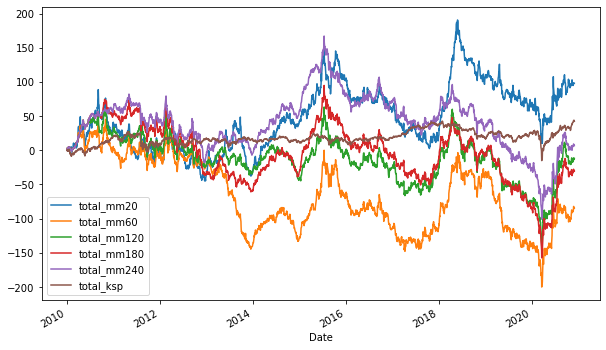

In [399]:
#best와 코스피
best_ksp=pd.merge(Df_best, rtn_ksp, left_index=True, right_index=True, how='inner')
best_ksp['total_mm20'] = best_ksp['best_20'].cumsum()
best_ksp['total_mm60'] = best_ksp['best_60'].cumsum()
best_ksp['total_mm120'] = best_ksp['best_120'].cumsum()
best_ksp['total_mm180'] = best_ksp['best_180'].cumsum()
best_ksp['total_mm240'] = best_ksp['best_240'].cumsum()
best_ksp['total_ksp'] = best_ksp['Close'].cumsum()
eqtbest=pd.concat([best_ksp['total_mm20'], best_ksp['total_mm60'],best_ksp['total_mm120'],best_ksp['total_mm180'],best_ksp['total_mm240'],best_ksp['total_ksp']],axis=1)
eqtbest.plot()

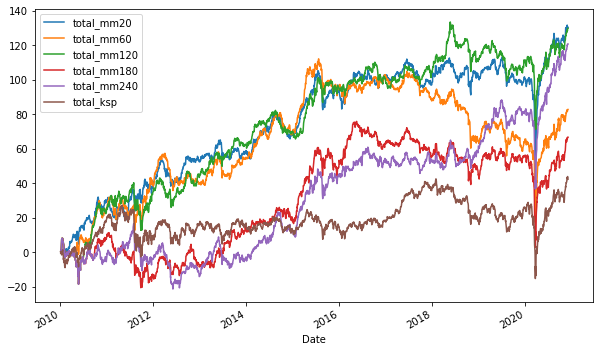

In [400]:
#median과 코스피
median_ksp=pd.merge(Df_median, rtn_ksp, left_index=True, right_index=True, how='inner')
median_ksp['total_mm20'] = median_ksp['median_20'].cumsum()
median_ksp['total_mm60'] = median_ksp['median_60'].cumsum()
median_ksp['total_mm120'] = median_ksp['median_120'].cumsum()
median_ksp['total_mm180'] = median_ksp['median_180'].cumsum()
median_ksp['total_mm240'] = median_ksp['median_240'].cumsum()
median_ksp['total_ksp'] = median_ksp['Close'].cumsum()
eqtmedian=pd.concat([median_ksp['total_mm20'], median_ksp['total_mm60'],median_ksp['total_mm120'],median_ksp['total_mm180'],median_ksp['total_mm240'],median_ksp['total_ksp']],axis=1)
eqtmedian.plot()

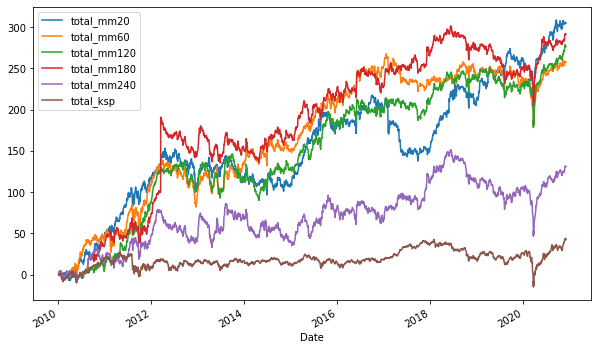

In [401]:
#worst와 코스피
worst_ksp=pd.merge(Df_worst, rtn_ksp, left_index=True, right_index=True, how='inner')
worst_ksp['total_mm20'] = worst_ksp['worst_20'].cumsum()
worst_ksp['total_mm60'] = worst_ksp['worst_60'].cumsum()
worst_ksp['total_mm120'] = worst_ksp['worst_120'].cumsum()
worst_ksp['total_mm180'] = worst_ksp['worst_180'].cumsum()
worst_ksp['total_mm240'] = worst_ksp['worst_240'].cumsum()
worst_ksp['total_ksp'] = worst_ksp['Close'].cumsum()
eqtworst=pd.concat([worst_ksp['total_mm20'], worst_ksp['total_mm60'],worst_ksp['total_mm120'],worst_ksp['total_mm180'],worst_ksp['total_mm240'],worst_ksp['total_ksp']],axis=1)
eqtworst.plot()

## 7번

# 시장에 투자할 수 있다면 시장과 Median포트폴리오의 투자전략을 선택하겠습니다. 주식투자의 궁극적인 목표는 시장수익이고 여러수치가 Median이 제일 비슷하다고 나타내고 있습니다. 상관계수가 그 중 가장 높고, 평균은 양수이고 표준편차는 낮습니다.